# Total Return CAPE Ratio

### Prof. Shiller addressed the criticism of traditional CAPE ratio, that changes in corporate payout policy, such as share repurchases instead of dividends as dominant approach in the USA for cash distribution to shareholders, which can affect the growth rate and the average of the real earnings per share used in the CAPE ratio, by develping a Total Return CAPE, which corrects this bias by reinvesting dividents into the price index and properly scaling earnings per share.

### Total Return EPS tells us what earnings would have been if the dividend payout ratio had been 0% at all times. This way, it reduces all earnings data across all periods of history to the same common basis, allowing for accurate comparisons between any two points in time.

 ### Total Return CAPE is used as a valuation metric to forecast future returns, where a higher CAPE ratio could reflect lower returns over the next couple of decades, whereas a lower CAPE ratio could reflect higher returns over the next couple of decades, as the ratio reverts back to the mean.

Source:

[Online Data Robert Shiller](http://www.econ.yale.edu/~shiller/data.htm)
 
[A New-and-Improved Shiller CAPE: Solving the Dividend Payout Ratio Problem](http://www.philosophicaleconomics.com/2015/03/payout/)

In [156]:
import pandas as pd
import numpy as np
import requests
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [157]:
# Read in the excel file and select the appropriate Data sheet
tr_cape = pd.read_excel('http://www.econ.yale.edu/~shiller/data/ie_data.xls', sheet_name='Data', skiprows=7, skipfooter=1)

 # Keep only the columns 'Date', 'TR CAPE','Yield' and 'P' 
tr_cape = tr_cape[['Date', 'TR CAPE', 'Yield','P']].dropna()

# Save excel file
tr_cape = tr_cape.to_excel('resources/tr_cape.xlsx', engine='xlsxwriter')

In [158]:
# Read in saved excel file
tr_cape = pd.read_excel('resources/tr_cape.xlsx')

# Convert the 'Date' column to a year-month format (YYYY-MM)
tr_cape['Date'] = tr_cape['Date'].astype(str).str.replace('.', '-')

# Drop duplicate column, rename columns
tr_cape = tr_cape.drop(columns='Unnamed: 0').rename(columns={'TR CAPE':'TR_CAPE','Yield':'ECY(%)','P':'S&P500'})

tr_cape

,Date,TR_CAPE,ECY(%),S&P500
0,1881-01,24.135057,-0.010489,6.190000
1,1881-02,23.655503,-0.011393,6.170000
2,1881-03,23.767713,-0.013123,6.240000
3,1881-04,23.308850,-0.007504,6.220000
4,1881-05,24.456686,-0.008881,6.500000
...,...,...,...,...
1708,2023-05,31.137839,0.026091,4146.173182
1709,2023-06,32.406031,0.023008,4345.372857
1710,2023-07,33.384492,0.020635,4508.075500
1711,2023-08,32.906500,0.018357,4457.358696


In [159]:
# Modifies the Date column to correct date strings where the month had one digit and October appears as January. It appends a '0' to such months to make them consistent with the 'YYYY-MM' format.
tr_cape['Date'] = tr_cape['Date'].astype('string')
tr_cape['Date'] = tr_cape['Date'].apply(lambda x: x if len(x.split('-')[1]) == 2 else x+'0')

# Transform the 'Date' column into datetime format and select data from 1945
tr_cape['Date'] = pd.to_datetime(tr_cape['Date'])
tr_cape = tr_cape.loc[tr_cape['Date'].dt.year >= 1945]
tr_cape = tr_cape.set_index('Date')
tr_cape

,TR_CAPE,ECY(%),S&P500
Date,,,
1945-01-01,15.850197,0.087187,13.490000
1945-02-01,16.360842,0.084002,13.940000
1945-03-01,16.339009,0.084273,13.930000
1945-04-01,16.745880,0.081695,14.280000
1945-05-01,17.276370,0.079962,14.820000
...,...,...,...
2023-05-01,31.137839,0.026091,4146.173182
2023-06-01,32.406031,0.023008,4345.372857
2023-07-01,33.384492,0.020635,4508.075500


In [160]:
# Calculate TR CAPE stats
stats = tr_cape['TR_CAPE'].describe()
stats

count    945.000000
mean      22.671468
std        8.168067
min        8.400297
25%       16.022450
50%       22.355432
75%       27.591423
max       48.110969
Name: TR_CAPE, dtype: float64

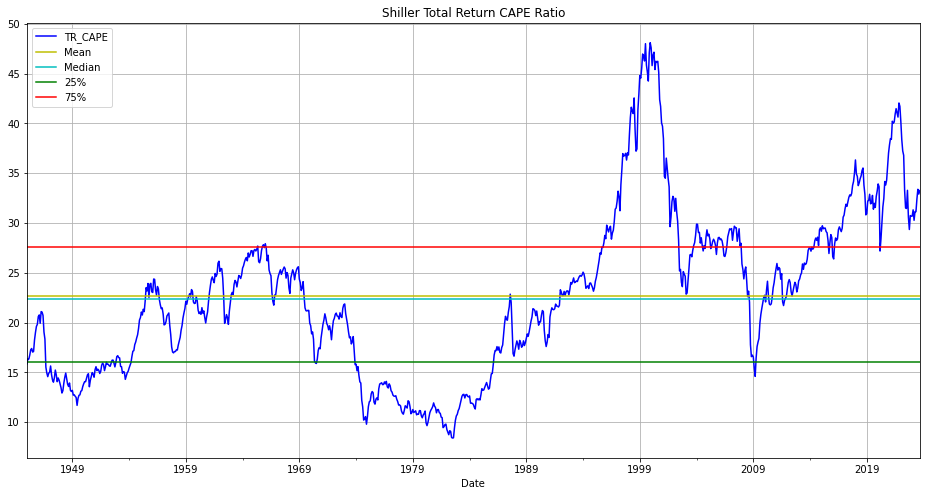

In [161]:
# Plot TR CAPE mean, median, 25% and 75% values over selected time frame
tr_cape['TR_CAPE'].plot(figsize=(16,8), title='Shiller Total Return CAPE Ratio', legend=True, c='b', grid=True)
plt.axhline(stats['mean'], c='y', label='Mean')
plt.axhline(stats['50%'], label='Median', c='c')
plt.axhline(stats['25%'], label='25%', c='g')
plt.axhline(stats['75%'], label='75%', c='r')
plt.legend()

# ECY - Excess CAPE Yield 
### ECY is calculated by the inverse of Shiller PE, which is the Shiller earnings yield, subtracted by the U.S. 10-year real Treasury bond yield. Higher ECY values indicate higher equity premium over bonds which makes stocks more attractive.
Source: 

[Equity market valuation in light of low interest rates - Ana Maria Ceh Jonatan Manfredini Ola Melander Stephan Wollert](https://www.riksbank.se/globalassets/media/rapporter/staff-memo/engelska/2021/equity-market-valuation-in-light-of-low-interest-rates.pdf)

In [162]:
stats_ecy = tr_cape['ECY(%)'].describe()
stats_ecy 

count    945.000000
mean       0.044933
std        0.033304
min       -0.015217
25%        0.019361
50%        0.034596
75%        0.065743
max        0.143597
Name: ECY(%), dtype: float64

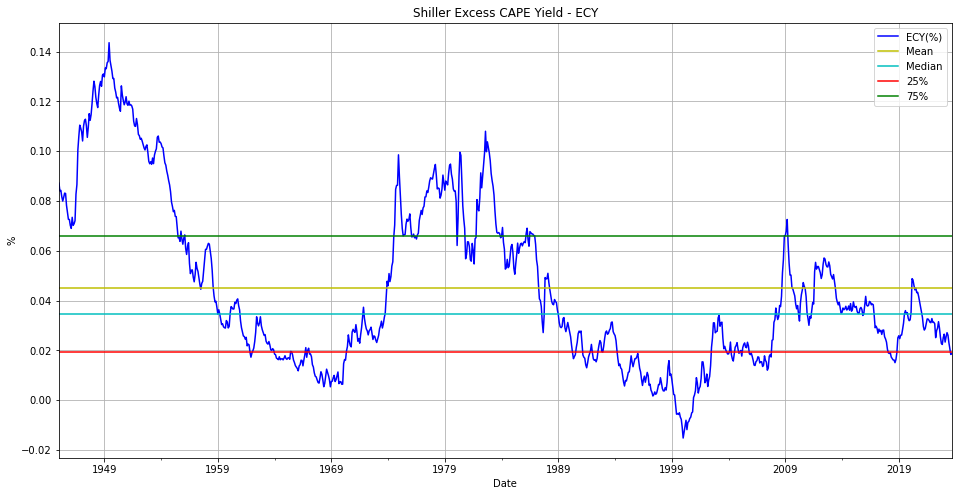

In [163]:
# Read in ECY and S&P 500 data from Online Data Robert Shiller, drop nans, convert Date to str, edit Date column, 
# Convert to datetime, set date as index, edit column names, use data from 1970-2020
# Plot ECY mean, median, 25% and 75% values over selected time frame
tr_cape['ECY(%)'].plot(figsize=(16,8), title='Shiller Excess CAPE Yield - ECY', legend=True, c='b', grid=True)
plt.axhline(stats_ecy['mean'], c='y', label='Mean')
plt.axhline(stats_ecy['50%'], label='Median', c='c')
plt.axhline(stats_ecy['25%'], label='25%', c='r')
plt.axhline(stats_ecy['75%'], label='75%', c='g')
plt.ylabel('%')
plt.legend()

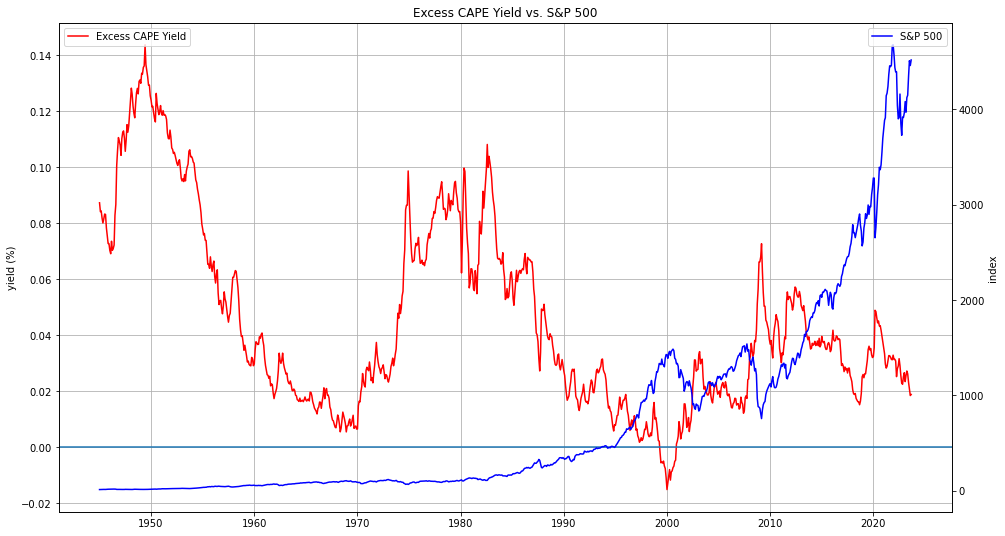

In [164]:
# Plot ECY vs S&P 500 
fig, ax = plt.subplots(figsize=(16,9))
plt.plot(tr_cape['ECY(%)'], label ='Excess CAPE Yield', color='r')
ax.set_ylabel('yield (%)')
ax.axhline(y=0)
ax.legend(loc='upper left')
ax.grid()

ax2 = ax.twinx()
plt.plot(tr_cape['S&P500'], label='S&P 500', color='b')
ax.set_title('Excess CAPE Yield vs. S&P 500')
ax2.set_ylabel('index')
ax2.legend(loc='upper right')